In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
data = pd.read_excel('dataframe2.xlsx', sheet_name = 'Dataframe')
df = data.copy() #une copie pour garder l'original de côté
df.head()

,Observation,Category
0,Fuite d'huile moteurs V.F. Staffa A4,Moteur hydraulique
1,REMISE À NEUF MOTEUR STAFFA V. F. GROUPES Gr11,Moteur hydraulique
2,fuite d'huile importante sur moteur 2,Moteur hydraulique
3,remplacer moteur Staffa,Moteur hydraulique
4,Bloqué par interférence moteur #1,Moteur hydraulique


In [20]:
df.shape  #dimensions

(525, 2)

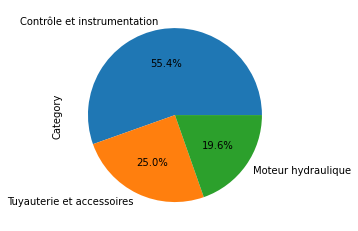

In [4]:
df.Category.value_counts().plot.pie(autopct="%.1f%%") #Répartion des classes en proportion

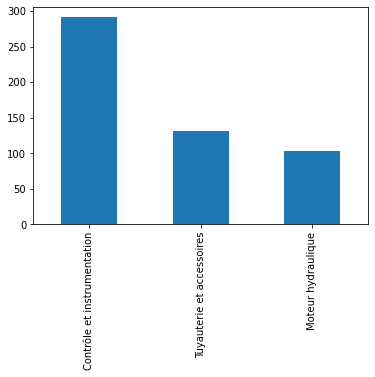

In [19]:
df.Category.value_counts().plot(kind='bar') # Répartition des classes en effectif

## Nettoyage 

### Abréviations et standardisation des mots

In [372]:
documents = [doc for doc in df.Observation] # on place tous les texte dans une liste pour faciliter leur traitement
documents = [re.sub("\sSM", " servomoteur ", doc) for doc in documents] #remplace l'abréviation SM par servomoteur
documents2 = [doc.lower() for doc in documents]# Tout en lettres minuscules pour faciliter le traitement
documents2 = [re.sub("servo-moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("servo moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("servo -moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("servo- moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("selenoid", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("selenoide", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("sélénoid", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("sélénoide", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("solenoïde", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("solenoid", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("solénoide", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("disj.\s", " disjoncteur ", doc) for doc in documents2]
documents2 = [re.sub("alim.\s", " alimentation ", doc) for doc in documents2]
documents2 = [re.sub("ind.\s", " indique ", doc) for doc in documents2]
documents2 = [re.sub("cmd\s", " commande ", doc) for doc in documents2]
documents2 = [re.sub("cmde", " commande ", doc) for doc in documents2]
documents2 = [re.sub("stafa", "staffa", doc) for doc in documents2]
documents2 = [re.sub("stapha", "staffa", doc) for doc in documents2]
documents2 = [re.sub("stafa", "staffa", doc) for doc in documents2]
documents2 = [re.sub("guarde", "garde", doc) for doc in documents2]
documents2 = [re.sub("foureau", "fourreau", doc) for doc in documents2]
# suppression des mots vanne, fourreau et garde
documents2 = [re.sub("vanne", " ", doc) for doc in documents2]
documents2 = [re.sub("fourreau", " ", doc) for doc in documents2]
documents2 = [re.sub("garde", " ", doc) for doc in documents2]
# Suppression de tous les caractères non alphabétiques
documents2 = [re.sub("[\d\W]+", " ", doc) for doc in documents2]
#suppression des mots contenant moins de trois caractères
documents2 = [re.sub(r'\s+', ' ', doc, flags=re.I) for doc in documents2] #suppression des espaces en trop
#Tokenization
tokens = [[word for word in doc.split() if len(word)>2] for doc in documents2] # Tokens en supprimant les mots dont len<3

## Stemming

In [373]:
# On normalise les tokens en transformant les mots en leur racine
from nltk.stem import SnowballStemmer

In [374]:
stem = [[SnowballStemmer('french').stem(word) for word in doc] for doc in tokens] # stemming 

In [375]:
from nltk.corpus import stopwords 

In [376]:
stopword = stopwords.words('french')
stem2 = [[word for word in doc if word not in stopword] for doc in stem] # liste stem actualisée sans les stopwords

In [377]:
df['tokens'] = tokens
df['stem_tokens_no_stopwords'] = stem2

In [378]:
def list_to_string(txt):
    txt = ' '.join(txt)
    return txt

In [379]:
df['clean_sentence'] = df['stem_tokens_no_stopwords'].apply(lambda x: list_to_string(x)) 

In [380]:
df = df.drop_duplicates(subset='clean_sentence', keep='first') #Suppression des duplications
df.shape

(451, 6)

In [381]:
from sklearn.preprocessing import LabelEncoder

In [382]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['Category'])

<ipython-input-382-dd36d70791d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['Category'])


In [383]:
df

,Observation,Category,tokens,stem_tokens_no_stopwords,clean_sentence,target
0,Fuite d'huile moteurs V.F. Staffa A4,Moteur hydraulique,"[fuite, huile, moteurs, staffa]","[fuit, huil, moteur, staff]",fuit huil moteur staff,1
1,REMISE À NEUF MOTEUR STAFFA V. F. GROUPES Gr11,Moteur hydraulique,"[remise, neuf, moteur, staffa, groupes]","[remis, neuf, moteur, staff, group]",remis neuf moteur staff group,1
2,fuite d'huile importante sur moteur 2,Moteur hydraulique,"[fuite, huile, importante, sur, moteur]","[fuit, huil, import, moteur]",fuit huil import moteur,1
3,remplacer moteur Staffa,Moteur hydraulique,"[remplacer, moteur, staffa]","[remplac, moteur, staff]",remplac moteur staff,1
4,Bloqué par interférence moteur #1,Moteur hydraulique,"[bloqué, par, interférence, moteur]","[bloqu, interférent, moteur]",bloqu interférent moteur,1
...,...,...,...,...,...,...
518,RP O3E mise à jour automate vanne foureau gr#32,Contrôle et instrumentation,"[mise, jour, automate]","[mis, jour, automat]",mis jour automat,0
519,O3E VANNE GARDE FOURREAU - Changer Carte Automate,Contrôle et instrumentation,"[changer, carte, automate]","[chang, cart, automat]",chang cart automat,0
520,RP-C1 O3E VANNE DE GARDE FOURREAU Remplacer Bl...,Contrôle et instrumentation,"[remplacer, bloc, alimentation]","[remplac, bloc, aliment]",remplac bloc aliment,0
521,Plus d'alimentation au panneau de la vanne fou...,Contrôle et instrumentation,"[plus, alimentation, panneau]","[plus, aliment, panneau]",plus aliment panneau,0


## Fréquence des mots et visualisation

In [384]:
from nltk import FreqDist

In [385]:
cat_0 = []
cat_1 = []
cat_2 = []
cat = [0, 1, 2]
for i in cat:
    for j in df.stem_tokens_no_stopwords[df.target == i]:
        for element in j:
            if i==0:
                cat_0.append(element)
            if i==1:
                cat_1.append(element)
            if i==2:
                cat_2.append(element)

In [386]:
freq_dist_0 = FreqDist(cat_0)
freq_dist_0 = freq_dist_0.most_common(30)
freq_dist_0 = pd.DataFrame(freq_dist_0, columns=['Word_0', 'Frequence_0'])

freq_dist_1 = FreqDist(cat_1)
freq_dist_1 = freq_dist_1.most_common(30)
freq_dist_1 = pd.DataFrame(freq_dist_1, columns=['Word_1', 'Frequence_1'])

freq_dist_2 = FreqDist(cat_2)
freq_dist_2 = freq_dist_2.most_common(30)
freq_dist_2 = pd.DataFrame(freq_dist_2, columns=['Word_2', 'Frequence_2'])
print('==========contrôle et instrumentation========')
print(freq_dist_0[:10])
print()
print('==========Moteur hydraulique================')
print(freq_dist_1[:10])
print()
print('==========Tuyauterie et accessoires================')
print(freq_dist_2[:10])

==========contrôle et instrumentation========
     Word_0  Frequence_0
0    indiqu           82
1     alarm           59
2     posit           37
3    cadran           37
4   défectu           27
5  pression           27
6  ouvertur           22
7   anormal           19
8   command           18
9      ferm           17

==========Moteur hydraulique================
        Word_1  Frequence_1
0  servomoteur           40
1         fuit           29
2       moteur           28
3         huil           25
4        staff           16
5        bloqu            9
6       boulon            6
7          bas            6
8       import            5
9      remplac            5

==========Tuyauterie et accessoires================
     Word_2  Frequence_2
0      valv           38
1      fuit           20
2     chain           20
3     répar           14
4      huil           13
5  tuyauter           11
6  solénoïd           11
7    moteur           10
8     chang           10
9      pass           

In [387]:
from wordcloud import WordCloud

<Figure size 432x288 with 0 Axes>

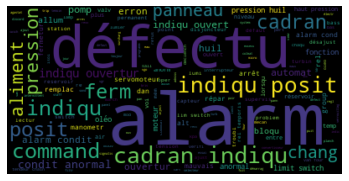

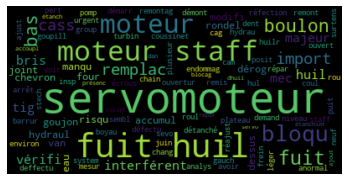

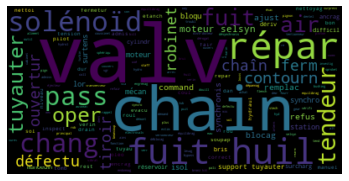

In [388]:
plt.figure()
plt.subplots()
classes = [cat_0, cat_1, cat_2]
for i in classes:
    separator = ','
    wordcloud = WordCloud().generate(separator.join(i))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Feature extraction - Bag Of Words

In [389]:
X = df['clean_sentence']
y = df['target']

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

In [392]:
from sklearn.feature_extraction.text import CountVectorizer 

In [393]:
count_vect = CountVectorizer()
vector = count_vect.fit_transform(X_train)

In [394]:
from sklearn.feature_extraction.text import TfidfTransformer

In [395]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(vector)

In [396]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Évaluation des modèles sans Tf-idf

In [397]:
from sklearn.pipeline import Pipeline

In [398]:
# On fixe un random_state pour évaluer les modèles sur la même base

text_clf_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf_1', MultinomialNB())
])

text_clf_2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf_2', SGDClassifier(random_state=42))
])

text_clf_3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf_3', DecisionTreeClassifier(random_state=42))
])


In [399]:
text_clf_1.fit(X_train, y_train) 
text_clf_2.fit(X_train, y_train) 
text_clf_3.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf_3', DecisionTreeClassifier(random_state=42))])

In [400]:
predicted_1 = text_clf_1.predict(X_test)
score_1 = np.mean(predicted_1 == y_test)

predicted_2 = text_clf_2.predict(X_test)
score_2 = np.mean(predicted_2 == y_test)

predicted_3 = text_clf_3.predict(X_test)
score_3 = np.mean(predicted_3 == y_test)

print('MultinomialNB: ',score_1)
print('SGDClassifier: ',score_2)
print('DecisionTree: ',score_3)

MultinomialNB:  0.9117647058823529
SGDClassifier:  0.9485294117647058
DecisionTree:  0.9044117647058824


### Évaluation des modèles avec Tf-idf

In [401]:
text_clf_11 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_11', MultinomialNB())
])

text_clf_22 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_22', SGDClassifier(random_state=42))
])

text_clf_33 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_33', DecisionTreeClassifier(random_state=42))
])


In [402]:
text_clf_11.fit(X_train, y_train) 
text_clf_22.fit(X_train, y_train) 
text_clf_33.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_33', DecisionTreeClassifier(random_state=42))])

In [409]:
predicted_11 = text_clf_11.predict(X_test)
score_11 = np.mean(predicted_11 == y_test)

predicted_22 = text_clf_22.predict(X_test)
score_22 = np.mean(predicted_22 == y_test)

predicted_33 = text_clf_33.predict(X_test)
score_33 = np.mean(predicted_33 == y_test)

print('MultinomialNB: ',score_11)
print('SGDClassifier: ',score_22)
print('DecisionTree: ',score_33)

MultinomialNB:  0.8823529411764706
SGDClassifier:  0.9338235294117647
DecisionTree:  0.8823529411764706


In [410]:
# SGDClassifier semble avoir le meilleur score dans les deux cas
# On constate que le Tfidf n'est pas approprié pour notre étude
# Matrice de confusion et rapport de classification de ce dernier sans tfidf

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predicted_2))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        76
           1       0.89      0.96      0.93        26
           2       0.92      0.97      0.94        34

    accuracy                           0.95       136
   macro avg       0.93      0.96      0.94       136
weighted avg       0.95      0.95      0.95       136



In [411]:
print(confusion_matrix(y_test, predicted_2))

[[71  3  2]
 [ 0 25  1]
 [ 1  0 33]]


## Parameters tuning

In [425]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__ngram_range': [(1,1), (1,2), (1,3)],
    'clf_2__alpha': ( 1e-4, 1e-5, 1e-6, 1e-7)
}

gs_clf_2 = GridSearchCV(text_clf_2, parameters, cv=6, n_jobs=-1)

gs_clf_2 = gs_clf_2.fit(X_train, y_train)

print(gs_clf_2.best_params_)
print(gs_clf_2.best_score_)

{'clf_2__alpha': 1e-06, 'vect__ngram_range': (1, 1)}
0.952467343976778


In [426]:
# Environ 95% de précision après le tuning des paramètres, pas si mal...
# Ressortons le rapport de classification et la matrice de confusion de ce modèle optimisé
predicted = gs_clf_2.best_estimator_.predict(X_test)
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        76
           1       0.93      1.00      0.96        26
           2       0.87      1.00      0.93        34

    accuracy                           0.95       136
   macro avg       0.93      0.97      0.95       136
weighted avg       0.95      0.95      0.95       136

[[69  2  5]
 [ 0 26  0]
 [ 0  0 34]]


In [369]:
# On remarque que la machine attribue plus de poids aux deux classes déséquilibrées... 
#...après l'observation des rapports de classification et matrices de confusion avant et après tuning

[ 26  52  78 104 131 157 183 209 235 262]


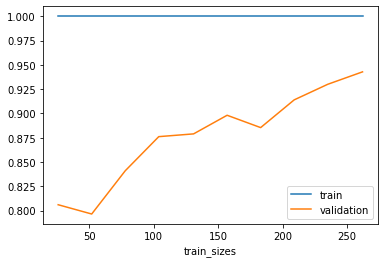

In [427]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(gs_clf_2.best_estimator_, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=6)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()